In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
songs = pd.read_csv(r'D:\justi\Documents\audio.csv')
addnl = pd.read_table('./data/tagtraum/msd_tagtraum_cd1.cls/msd_tagtraum_cd1.txt', sep='\t', skiprows=7, names=['track_id', 'Tag1', 'Tag2'])

In [3]:
df_m = songs.merge(addnl, on='track_id')

In [8]:
df_m = songs
songs.shape

(41000, 81)

In [9]:
df_m.iloc[1,:]

Unnamed: 0                                                       1
Unnamed: 1                                                       0
analysis_sample_rate                                         22050
audio_md5                         6dd67592ca97754d3c7f611fa225d202
danceability                                                     0
duration                                                   149.942
end_of_fade_in                                               0.125
energy                                                           0
idx_bars_confidence                                              0
idx_bars_start                                                   0
idx_beats_confidence                                             0
idx_beats_start                                                  0
idx_sections_confidence                                          0
idx_sections_start                                               0
idx_segments_confidence                                       

There are several categoricals that should be removed as they are not appropriate for the analysis we want to calculate. For example, track names, artist name and album name are all unuseful. Additionally, everything with an
idx label can be dropped as the data is incomplete. Finally, any value that does not change can be removed.

In [10]:
df_m.drop(columns = ['Unnamed: 0','genre', 'artist_mbid', 'artist_name','release', 'release_7digitalid', 'audio_md5', 'track_id',
                     'song_id', 'title', 'track_7digitalid', 'Tag2', 'artist_id', 'artist_7digitalid', 'artist_playmeid'], inplace = True)

In [7]:
cols = [c for c in df_m.columns if c[0:3] != 'idx']
df_m=df_m[cols]
df_m.head()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,...,time_signature_confidence,analyzer_version,artist_familiarity,artist_hotttnesss,artist_latitude,artist_location,artist_longitude,song_hotttnesss,year,Tag1
0,22050,0.0,211.59138,0.000,0.0,7,0.488,-7.446,1,0.677,...,0.778,NaN,0.531736,0.409133,57.15382,"Aberdeen, Scotland",-2.10679,NaN,1997,Pop_Rock
1,22050,0.0,222.87628,0.000,0.0,3,0.893,-10.210,1,0.631,...,0.271,NaN,0.818745,0.539509,37.77916,"San Francisco, California",-122.42005,NaN,1966,Pop_Rock
2,22050,0.0,193.93261,0.984,0.0,10,0.413,-9.923,1,0.448,...,1.000,NaN,0.815650,0.590374,NaN,NaN,NaN,NaN,2005,Electronic
3,22050,0.0,180.55791,0.472,0.0,7,0.620,-10.738,1,0.521,...,0.000,NaN,0.743284,0.461002,NaN,NaN,NaN,0.447136,1993,Pop_Rock
4,22050,0.0,280.21506,0.238,0.0,5,0.555,-3.306,1,0.500,...,0.120,NaN,0.780462,0.574275,NaN,"Atlanta, GA",NaN,0.597641,2001,Pop_Rock


In [11]:
cols = [c for c in df_m.columns if df_m[c].nunique() >1]
df_m=df_m[cols]
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,...,timbre_3,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,timbre_10,timbre_11,Tag1
0,354.48118,2.090,9,0.721,-8.413,1,0.628,344.108,154.238,4,...,-12.591367,-44.293892,-9.339179,1.056260,-5.776037,-0.371761,1.495389,-3.848946,3.408958,Metal
1,149.94240,0.125,8,0.743,-9.047,1,0.572,142.861,158.292,4,...,22.914455,-17.480633,17.263987,-17.580544,-17.936875,8.633928,-13.547967,6.287460,11.251171,Reggae
2,277.36771,0.337,8,0.905,-8.524,1,0.742,269.189,115.760,4,...,13.774541,2.580982,11.298542,10.419430,7.336860,6.748059,6.381776,-2.017867,3.545710,Rock
3,243.66975,0.000,5,0.004,-5.955,1,0.252,236.832,92.471,3,...,-1.522568,-38.959342,3.488617,-20.363588,-1.984596,8.714976,1.564731,0.980308,6.970074,Blues
4,241.76281,1.013,9,0.000,-4.265,1,0.280,228.223,90.206,4,...,-2.802598,9.080180,-19.506204,5.333402,-3.767534,-1.610557,-5.408886,0.984205,6.117556,Rock


In [12]:
df_m.shape

(41000, 43)

The artist features should also be dropped. The analysis here is using song information.

In [13]:
cols = [c for c in df_m.columns if c[0:6] != 'artist']
df_m=df_m[cols]
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,...,timbre_3,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,timbre_10,timbre_11,Tag1
0,354.48118,2.090,9,0.721,-8.413,1,0.628,344.108,154.238,4,...,-12.591367,-44.293892,-9.339179,1.056260,-5.776037,-0.371761,1.495389,-3.848946,3.408958,Metal
1,149.94240,0.125,8,0.743,-9.047,1,0.572,142.861,158.292,4,...,22.914455,-17.480633,17.263987,-17.580544,-17.936875,8.633928,-13.547967,6.287460,11.251171,Reggae
2,277.36771,0.337,8,0.905,-8.524,1,0.742,269.189,115.760,4,...,13.774541,2.580982,11.298542,10.419430,7.336860,6.748059,6.381776,-2.017867,3.545710,Rock
3,243.66975,0.000,5,0.004,-5.955,1,0.252,236.832,92.471,3,...,-1.522568,-38.959342,3.488617,-20.363588,-1.984596,8.714976,1.564731,0.980308,6.970074,Blues
4,241.76281,1.013,9,0.000,-4.265,1,0.280,228.223,90.206,4,...,-2.802598,9.080180,-19.506204,5.333402,-3.767534,-1.610557,-5.408886,0.984205,6.117556,Rock


Finally. While they aren't necessarily out of the scope of the analysis. Given that this objective is meant to be used as a tool to predict new songs it seems the information provided cannot be used so they will be dropped

In [14]:
df_m.drop(columns = ['song_hotttnesss', 'year'], inplace = True)

In [15]:
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,...,timbre_3,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,timbre_10,timbre_11,Tag1
0,354.48118,2.090,9,0.721,-8.413,1,0.628,344.108,154.238,4,...,-12.591367,-44.293892,-9.339179,1.056260,-5.776037,-0.371761,1.495389,-3.848946,3.408958,Metal
1,149.94240,0.125,8,0.743,-9.047,1,0.572,142.861,158.292,4,...,22.914455,-17.480633,17.263987,-17.580544,-17.936875,8.633928,-13.547967,6.287460,11.251171,Reggae
2,277.36771,0.337,8,0.905,-8.524,1,0.742,269.189,115.760,4,...,13.774541,2.580982,11.298542,10.419430,7.336860,6.748059,6.381776,-2.017867,3.545710,Rock
3,243.66975,0.000,5,0.004,-5.955,1,0.252,236.832,92.471,3,...,-1.522568,-38.959342,3.488617,-20.363588,-1.984596,8.714976,1.564731,0.980308,6.970074,Blues
4,241.76281,1.013,9,0.000,-4.265,1,0.280,228.223,90.206,4,...,-2.802598,9.080180,-19.506204,5.333402,-3.767534,-1.610557,-5.408886,0.984205,6.117556,Rock


In [17]:
df_m.columns

Index(['duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'start_of_fade_out', 'tempo',
       'time_signature', 'time_signature_confidence', 'pitch_0', 'pitch_1',
       'pitch_2', 'pitch_3', 'pitch_4', 'pitch_5', 'pitch_6', 'pitch_7',
       'pitch_8', 'pitch_9', 'pitch_10', 'pitch_11', 'timbre_0', 'timbre_1',
       'timbre_2', 'timbre_3', 'timbre_4', 'timbre_5', 'timbre_6', 'timbre_7',
       'timbre_8', 'timbre_9', 'timbre_10', 'timbre_11', 'Tag1'],
      dtype='object')

In [16]:
df_m.loc[:, df_m.isna().any()].head()

""
0
1
2
3
4


Since there are no na values, we can proceed with further analytical measures

In [18]:
df_m['Tag1'].nunique()

15

Now that we have useable variables. They can be explore

In [19]:
import seaborn as sns

### Looking at distributions of different values at different categories

#### Loudness

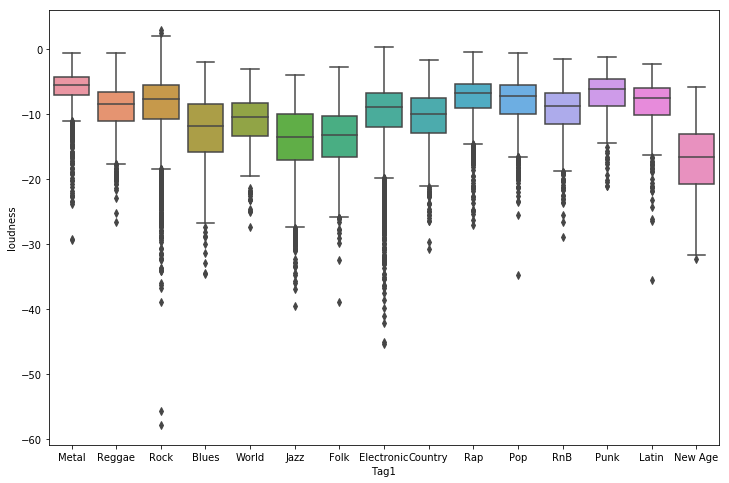

In [20]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='loudness', ax = ax)

#### Duration

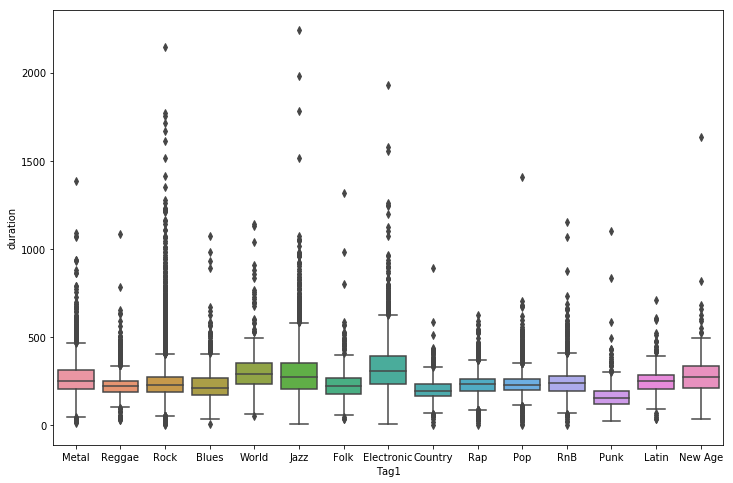

In [21]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='duration', ax = ax)

#### start_of_fade_out

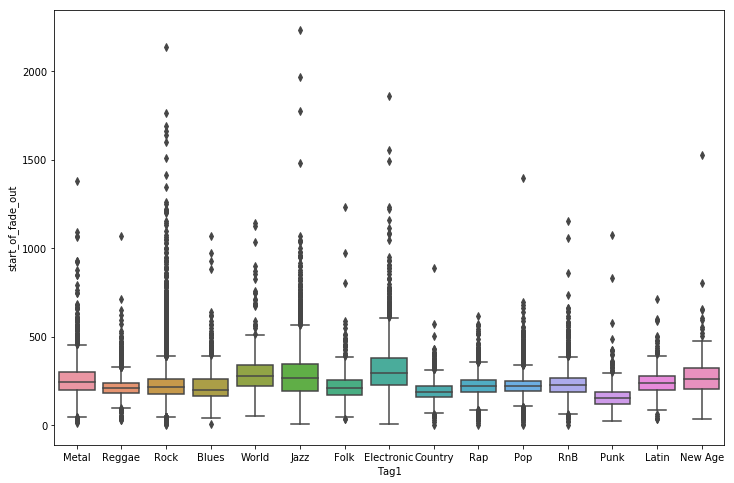

In [22]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='start_of_fade_out', ax = ax)

#### Tempo

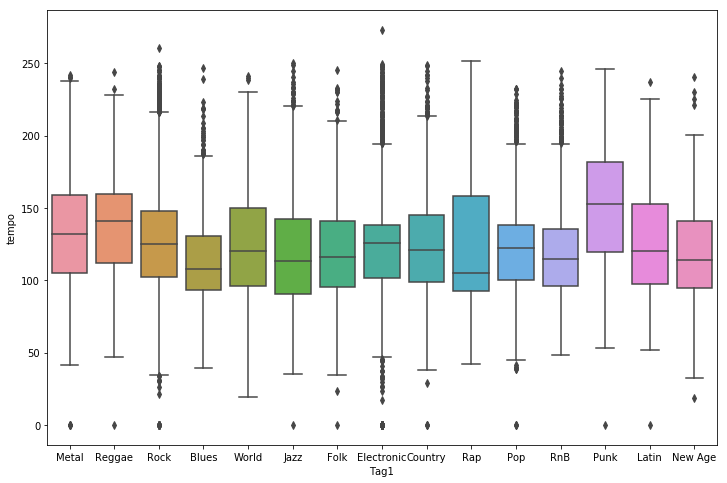

In [23]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='tempo', ax = ax)

### Now to visualize the categoricals

#### Mode

In [49]:
sub = df_m[['mode', 'Tag1']]

In [50]:
tally = pd.crosstab(sub['Tag1'],sub['mode'])
tally = tally.div(tally.sum(axis = 1), axis=0)

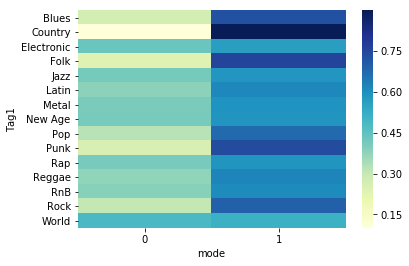

In [51]:
sns.heatmap(tally, cmap="YlGnBu")

#### Time Signature

In [42]:
sub = df_m[['time_signature', 'Tag1']]

In [47]:
tally = pd.crosstab(sub['Tag1'],sub['time_signature'])
tally = tally.iloc[:, 1:]
tally = tally.div(tally.sum(axis = 1), axis=0)

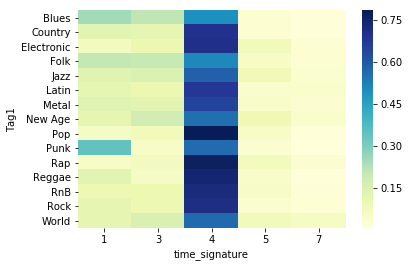

In [48]:
sns.heatmap(tally, cmap="YlGnBu")

In [36]:
sub['mode'].unique()

array([1, 0], dtype=int64)